## Plant disease classification with PyTorch

In [125]:
import torch
import glob
import os
import cv2
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from collections import defaultdict

### Download and extract data

In [126]:
# Uncomment to download data - 1.3GB 
# !curl -L -o ~/Downloads/plant-disease-recognition-dataset.zip\
#   https://www.kaggle.com/api/v1/datasets/download/rashikrahmanpritom/plant-disease-recognition-dataset
# !unzip ~/Downloads/plant-disease-recognition-dataset.zip -d ./data

In [127]:
train_path = "./data/Train/"
test_path = "./data/Test/"
validation_path = "./data/Validation/"
train_images = glob.glob(train_path+"**/*.jpg", recursive=True)
test_images = glob.glob(test_path+"**/*.jpg", recursive=True)
validation_images = glob.glob(validation_path+"**/*.jpg", recursive=True)

In [128]:
train_images[-2:]
#len(train_images)

['./data/Train/Rust/dfcc6b28063a88fc.jpg',
 './data/Train/Rust/aacedff0d881c189.jpg']

In [129]:
class PlantsLeavesDataset(Dataset):
    """Plants leaves dataset."""

    def __init__(self, image_paths, transform=None):
        """
        """
        self.label_map = {'Healthy': 0, 'Powdery':1, 'Rust':2}
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = self.image_paths[idx]
        image = cv2.imread(img_name)
        label_name = img_name.split('/')[-2]
        label = self.label_map[label_name]
        # label = np.array([label], dtype=float)

        if self.transform:
            image = self.transform(image)

        return image, label

In [130]:
train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    #transforms.RandomRotation(35),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((512,512)),
])

In [131]:
train_set = PlantsLeavesDataset(train_images, train_transform)
test_set = PlantsLeavesDataset(test_images, test_transform)
validation_set = PlantsLeavesDataset(validation_images, test_transform)

In [132]:
# shapes = defaultdict(int)
# for i in range(len(train_set)):
#     s = tuple(train_set[i][0].shape)
#     shapes[s] += 1
# shapes

In [133]:
batch_size = 64
train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_set, shuffle=False, batch_size=batch_size, drop_last=True)
val_loader = DataLoader(validation_set, shuffle=False, batch_size=batch_size, drop_last=True)

In [134]:
next(iter(train_loader))

[tensor([[[[0.5043, 0.4954, 0.4784,  ..., 0.3717, 0.3870, 0.4195],
           [0.4928, 0.4914, 0.4825,  ..., 0.3737, 0.3707, 0.3936],
           [0.4850, 0.4873, 0.4709,  ..., 0.3598, 0.3505, 0.3707],
           ...,
           [0.3100, 0.2828, 0.2609,  ..., 0.1299, 0.1429, 0.1529],
           [0.3138, 0.2859, 0.2779,  ..., 0.1321, 0.1457, 0.1537],
           [0.3132, 0.2892, 0.2846,  ..., 0.1363, 0.1484, 0.1563]],
 
          [[0.6376, 0.6295, 0.6223,  ..., 0.5366, 0.5405, 0.5574],
           [0.6262, 0.6245, 0.6174,  ..., 0.5396, 0.5324, 0.5407],
           [0.6180, 0.6192, 0.5989,  ..., 0.5280, 0.5214, 0.5302],
           ...,
           [0.4282, 0.4107, 0.4048,  ..., 0.3702, 0.3721, 0.3808],
           [0.4314, 0.4117, 0.4124,  ..., 0.3725, 0.3745, 0.3811],
           [0.4308, 0.4138, 0.4087,  ..., 0.3767, 0.3773, 0.3838]],
 
          [[0.4023, 0.3936, 0.3809,  ..., 0.2931, 0.2886, 0.3063],
           [0.3909, 0.3888, 0.3780,  ..., 0.2961, 0.2795, 0.2885],
           [0.3838, 0.38

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0016016666..1.0000002].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08238035..1.0000002].


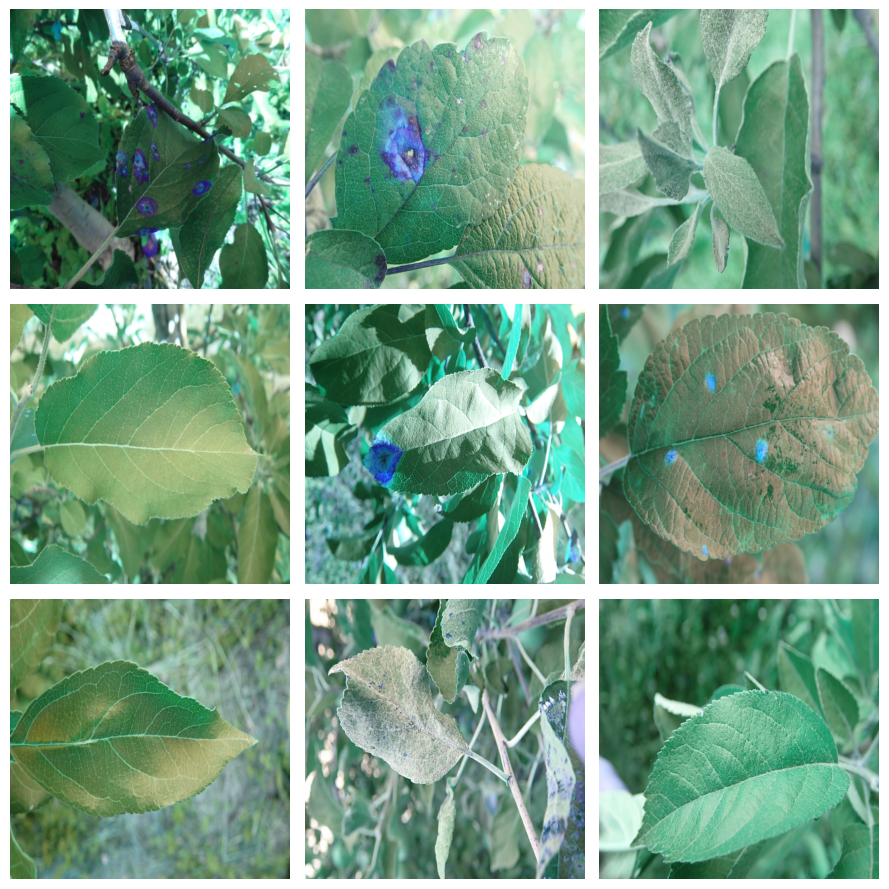

In [138]:
ims, labels = next(iter(train_loader))
ims = torch.einsum("bchw->bhwc", ims)
rows, cols = 3, 3
ims = ims[:rows*cols].view(rows, cols, 512, 512, 3)
fig, axs = plt.subplots(rows, cols, figsize=(3*rows, 3*cols))
for A, I in zip(axs,ims):
    for ax, img in zip(A,I):
        ax.set_aspect('equal')
        ax.axis('off')
        ax.imshow(img)
fig.tight_layout()
#fig.subplots_adjust(hspace=0, wspace=0)
#plt.savefig(save_fig_path, facecolor='w', edgecolor='none')
plt.show()
